In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
import calendar
from datetime import datetime
import numpy as np
import missingno as msno
import csv
import json
from heatmap import heatmap, corrplot
import plotly.express as px

%matplotlib inline
%config InlineBackend.figure_format="retina"


In [3]:
youtuberdata = pd.read_csv("Finalproject1.csv")
youtuberdata.head()

,No,Date_upload,Day_upload,Time_upload,video,Views,Length,Likes,Dislikes,Comments,the_channel,Category,subs_view_percentage,Ratings
0,1,07-03-2021,Sunday,18:00:00,Annoying Things Our Boyfriends Do,16263,04:48:00,1700,42,328,Wah Banana,COMEDY,1.23,97.69
1,2,28-02-2021,Sunday,18:00:00,Every Asian Auntie,133345,05:02:00,5400,63,445,Wah Banana,COMEDY,9.62,98.89
2,3,07-02-2021,Sunday,18:00:00,If We Acted Like Out Parents During CNY,155175,05:01:00,6200,51,378,Wah Banana,COMEDY,11.86,99.20
3,4,31-12-2018,Monday,13:10:00,What happened in 2018,140555,02:42:00,5600,72,727,Wah Banana,COMEDY,10.65,98.74
4,5,27-12-2020,Sunday,15:00:00,If Pets Could Talk,179431,08:32:00,2300,322,382,Ryan Sylvia,COMEDY,17.96,88.04


In [3]:
# youtuberdata['Date_upload'] = pd.to_numeric(youtuberdata['Likes'],errors='coerce')

In [4]:
youtuberdata.corr()

,No,Views,Likes,Dislikes,Comments,Ratings
No,1.000000,0.225292,0.271904,0.208041,0.273274,0.135165
Views,0.225292,1.000000,0.927269,0.965284,0.819876,-0.037696
Likes,0.271904,0.927269,1.000000,0.891864,0.931996,0.058488
Dislikes,0.208041,0.965284,0.891864,1.000000,0.783538,-0.106117
Comments,0.273274,0.819876,0.931996,0.783538,1.000000,0.074809
Ratings,0.135165,-0.037696,0.058488,-0.106117,0.074809,1.000000


In [4]:
youtuberdata.shape

(560, 14)

In [5]:
top10_shows = youtuberdata.sort_values(by=['Length'])[-1:-11:-1]
top10_shows[['video','Length']]

,video,Length
407,The Killer Game EP1 - The Best Detective VS Th...,23:57:00
544,What Happens When A 32-Year Old Single Man Tri...,23:55:00
522,Ultimate Taipei FOOD TOUR GUIDE! | Street Food...,23:45:00
298,Math Test With Fans! Who Is Smarter?,23:45:00
212,Food King Singapore: We Cooked a Meal Under 5 ...,23:24:00
271,The Truth Behind Our First Reality Show | kNOC...,23:21:00
225,We Try $148 Chinese New Year Snacks! | Food Ki...,23:14:00
292,Girl Cries At Work | What Would You Do? | Soci...,23:05:00
179,All We Want For Christmas Is THIS DISH!,22:58:00
299,Spicy Mala Challenge With Fans!,22:48:00


In [6]:
youtuberdata.count()

No                      560
Date_upload             560
Day_upload              560
Time_upload             560
video                   560
Views                   560
Length                  560
Likes                   560
Dislikes                560
Comments                560
the_channel             560
Category                560
subs_view_percentage    560
Ratings                 560
dtype: int64

In [8]:
youtuberdata.nlargest(5, 'Views')

,No,Date_upload,Day_upload,Time_upload,video,Views,Length,Likes,Dislikes,Comments,the_channel,Category,subs_view_percentage,Ratings
445,446,13-05-2018,Sunday,21:40:00,GOOD STUDENTS vs BAD STUDENTS,38739400,08:43:00,394000,21000,50251,JianHao Tan,The Titan Academy(School Series),100.00,94.89
435,436,18-11-2018,Sunday,20:57:00,Thirteen 13 Types of Students After Exams,33738782,10:27:00,315000,21000,29468,JianHao Tan,The Titan Academy(School Series),100.00,93.59
436,437,28-10-2018,Sunday,19:00:00,Eleven 11 Types of Students in an Exam,32585502,10:28:00,302000,16000,21823,JianHao Tan,The Titan Academy(School Series),100.00,94.72
427,428,01-09-2019,Sunday,21:00:00,Good Teachers Vs Bad Teachers,29373043,14:17:00,422000,14000,52082,JianHao Tan,The Titan Academy(School Series),100.00,96.60
352,353,09-09-2018,Sunday,21:00:00,Rich People VS Normal People,28380054,10:07:00,275000,17000,17270,JianHao Tan,RECOMMENDED(TOP PICK),100.00,94.27


In [8]:
youtuberdata['Category'].unique()

array(['COMEDY', 'Daily Vlogs', 'DO IT FOR MONEY',
       'Food King Singapore 2018', 'Food King Singapore 2019',
       'Food King Singapore 2020', 'Food King Singapore 2021', 'GAMER',
       'How People_', 'How To_', "IT'S PERSONAL(Series about my life)",
       'kNOCK OUT! (Reality Show)', 'Life of JianHao', 'LIFESTYLE VIDEOS',
       'Master Debater', 'NOC Behind The Scenes', 'NOC Nailed it!',
       'NOC Short Films', 'NOC Spotlight', 'RECOMMENDED(TOP PICK)',
       'Short Film Wannabe',
       'TDAP: The Delicate Art of Production (With celebrity)',
       "Terence's hacks", 'The Killer Game Season 1',
       'The Killer Game Season 2', 'The Killer Game Season 3',
       'The Killer Game Season 4', 'The Titan Academy(School Series)',
       'TITAN CHRISTMAS SPECIAL',
       'TITAN QUARANTINE(Content from all of Titan)',
       'TOP PICKS (Our Favs!)', 'Trailer', 'TRAVEL', 'TRAVEL GUIDES',
       'Types Of', 'VLOGS', 'VS', 'What Happens When', 'Baby Starley',
       "Bananas' Choi

In [9]:
youtuberdata['the_channel'].unique()

array(['Wah Banana', 'Ryan Sylvia', 'JianHao Tan'], dtype=object)

In [10]:
youtuberdata['Day_upload'].unique()

array(['Sunday', 'Monday', 'Wednesday', 'Saturday', 'Friday', 'Thursday'],
      dtype=object)

In [11]:
p'oyoutuberdata.columns

Index(['No', 'Date_upload', 'Day_upload', 'Time_upload', 'video', 'Views',
       'Length', 'Likes', 'Dislikes', 'Comments', 'the_channel', 'Category',
       'subs_view_percentage', 'Ratings'],
      dtype='object')

In [12]:
youtuberdata['video'] = youtuberdata['video'].astype(str)

In [13]:
youtuberdata.dtypes


No                        int64
Date_upload              object
Day_upload               object
Time_upload              object
video                    object
Views                     int64
Length                   object
Likes                     int64
Dislikes                  int64
Comments                  int64
the_channel              object
Category                 object
subs_view_percentage     object
Ratings                 float64
dtype: object

In [14]:
youtuberdata.head(5)

,No,Date_upload,Day_upload,Time_upload,video,Views,Length,Likes,Dislikes,Comments,the_channel,Category,subs_view_percentage,Ratings
0,1,07-03-2021,Sunday,18:00:00,Annoying Things Our Boyfriends Do,16263,04:48:00,1700,42,328,Wah Banana,COMEDY,1.23,97.69
1,2,28-02-2021,Sunday,18:00:00,Every Asian Auntie,133345,05:02:00,5400,63,445,Wah Banana,COMEDY,9.62,98.89
2,3,07-02-2021,Sunday,18:00:00,If We Acted Like Out Parents During CNY,155175,05:01:00,6200,51,378,Wah Banana,COMEDY,11.86,99.20
3,4,31-12-2018,Monday,13:10:00,What happened in 2018,140555,02:42:00,5600,72,727,Wah Banana,COMEDY,10.65,98.74
4,5,27-12-2020,Sunday,15:00:00,If Pets Could Talk,179431,08:32:00,2300,322,382,Ryan Sylvia,COMEDY,17.96,88.04


In [15]:
youtuberdata.tail(5)

,No,Date_upload,Day_upload,Time_upload,video,Views,Length,Likes,Dislikes,Comments,the_channel,Category,subs_view_percentage,Ratings
555,556,17-03-2019,Sunday,15:00:00,Are You A Game of Thrones Fan?,170397,05:07:00,3400,302,432,Ryan Sylvia,BEHIND THE SCENES,17.04,91.86
556,557,12-08-2018,Sunday,15:00:00,BTS: Singapore Like You’ve Never Seen Before,225226,13:12:00,4300,109,682,Ryan Sylvia,BEHIND THE SCENES,22.52,97.57
557,558,11-02-2018,Sunday,15:00:00,Mr Wong's Hokkien Word of the Day Ep 10: Zodia...,241927,05:43:00,3600,178,409,Ryan Sylvia,BEHIND THE SCENES,24.19,95.41
558,559,18-03-2018,Sunday,21:00:00,SPICY MUKBANG CHALLENGE,4105976,11:28:00,52000,1500,6356,JianHao Tan,CHALLENGES,89.45,97.07
559,560,04-03-2018,Sunday,19:30:00,YOUTUBER DODGEBALL CHALLENGE,6321944,13:50:00,71000,3000,11494,JianHao Tan,CHALLENGES,100.00,96.32


In [16]:
print(youtuberdata.Date_upload.min())
print(youtuberdata.Date_upload.max())


01-01-2021
31-12-2018


In [17]:
# For all columns:
youtuberdata.describe()

,No,Views,Likes,Dislikes,Comments,Ratings
count,560.000000,5.600000e+02,560.000000,560.000000,560.000000,560.000000
mean,280.500000,1.731583e+06,26083.541071,901.953571,3149.201786,96.612143
std,161.802349,4.313778e+06,54826.307629,2257.997615,6785.191473,1.863426
min,1.000000,1.626300e+04,400.000000,34.000000,0.000000,82.910000
25%,140.750000,3.112675e+05,4800.000000,157.750000,471.000000,96.030000
50%,280.500000,4.858090e+05,7600.000000,250.500000,729.000000,97.040000
75%,420.250000,9.992888e+05,16000.000000,514.000000,1578.500000,97.740000
max,560.000000,3.873940e+07,422000.000000,21000.000000,52082.000000,99.200000


In [18]:
# For individual col:

youtuberdata.describe()['Likes']

count       560.000000
mean      26083.541071
std       54826.307629
min         400.000000
25%        4800.000000
50%        7600.000000
75%       16000.000000
max      422000.000000
Name: Likes, dtype: float64

In [19]:
youtuberdata["Date_upload"]

0      07-03-2021
1      28-02-2021
2      07-02-2021
3      31-12-2018
4      27-12-2020
          ...    
555    17-03-2019
556    12-08-2018
557    11-02-2018
558    18-03-2018
559    04-03-2018
Name: Date_upload, Length: 560, dtype: object

In [20]:
youtuberdata["Time_upload"]

0      18:00:00
1      18:00:00
2      18:00:00
3      13:10:00
4      15:00:00
         ...   
555    15:00:00
556    15:00:00
557    15:00:00
558    21:00:00
559    19:30:00
Name: Time_upload, Length: 560, dtype: object

In [21]:
youtuberdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    560 non-null    int64  
 1   Date_upload           560 non-null    object 
 2   Day_upload            560 non-null    object 
 3   Time_upload           560 non-null    object 
 4   video                 560 non-null    object 
 5   Views                 560 non-null    int64  
 6   Length                560 non-null    object 
 7   Likes                 560 non-null    int64  
 8   Dislikes              560 non-null    int64  
 9   Comments              560 non-null    int64  
 10  the_channel           560 non-null    object 
 11  Category              560 non-null    object 
 12  subs_view_percentage  560 non-null    object 
 13  Ratings               560 non-null    float64
dtypes: float64(1), int64(5), object(8)
memory usage: 61.4+ KB


In [22]:
youtuberdata.isnull().sum()

No                      0
Date_upload             0
Day_upload              0
Time_upload             0
video                   0
Views                   0
Length                  0
Likes                   0
Dislikes                0
Comments                0
the_channel             0
Category                0
subs_view_percentage    0
Ratings                 0
dtype: int64

In [23]:
youtuberdata['Likes'].fillna(0,inplace=True)

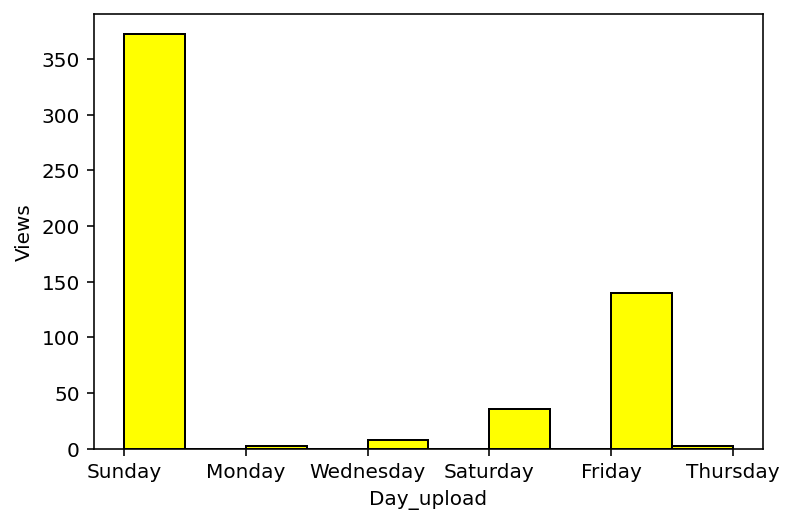

In [44]:
Likes = youtuberdata['Day_upload']

plt.hist(Likes,color=['yellow'], edgecolor='black')

plt.xlabel('Day_upload')
plt.ylabel('Views')

plt.show()


<AxesSubplot:>

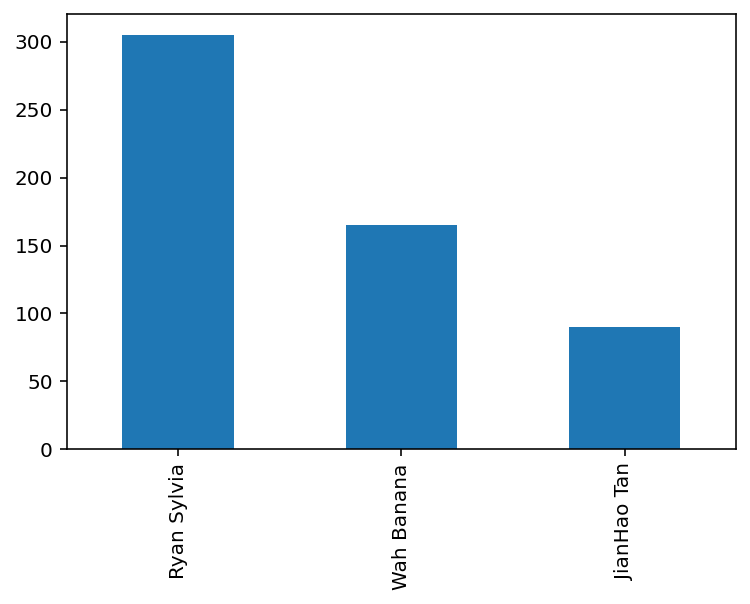

In [25]:
youtuberdata['the_channel'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

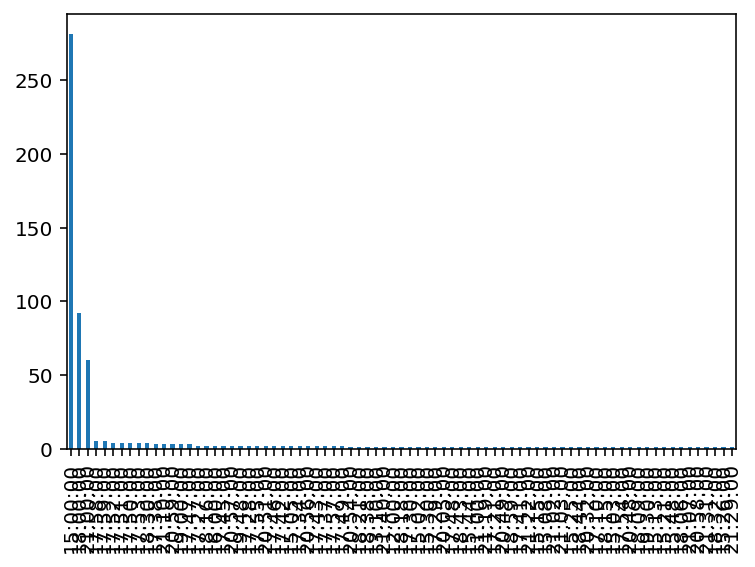

In [45]:
youtuberdata['Time_upload'].value_counts().plot(kind = 'bar')

video
Good Teachers Vs Bad Teachers                                          422000
GOOD STUDENTS vs BAD STUDENTS                                          394000
Sixteen 16 Types of Students on Picture Day                            325000
Thirteen 13 Types of Students After Exams                              315000
Eleven 11 Types of Students in an Exam                                 302000
                                                                        ...  
What Happens When A 32-Year Old Single Man Tries To Impress A Maid!      1800
Annoying Things Our Boyfriends Do                                        1700
Catching 758 Pok?ons In A Day! ft New NOC Girl                           1600
The REAL Husbands of Yishun                                              1535
How To Work Smart And Not Hard                                            400
Name: Likes, Length: 372, dtype: int64
<bound method Series.nlargest of video
12 Countries Surprise Singapore                           

<AxesSubplot:xlabel='video'>

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65281 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127471 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127477 missing from current

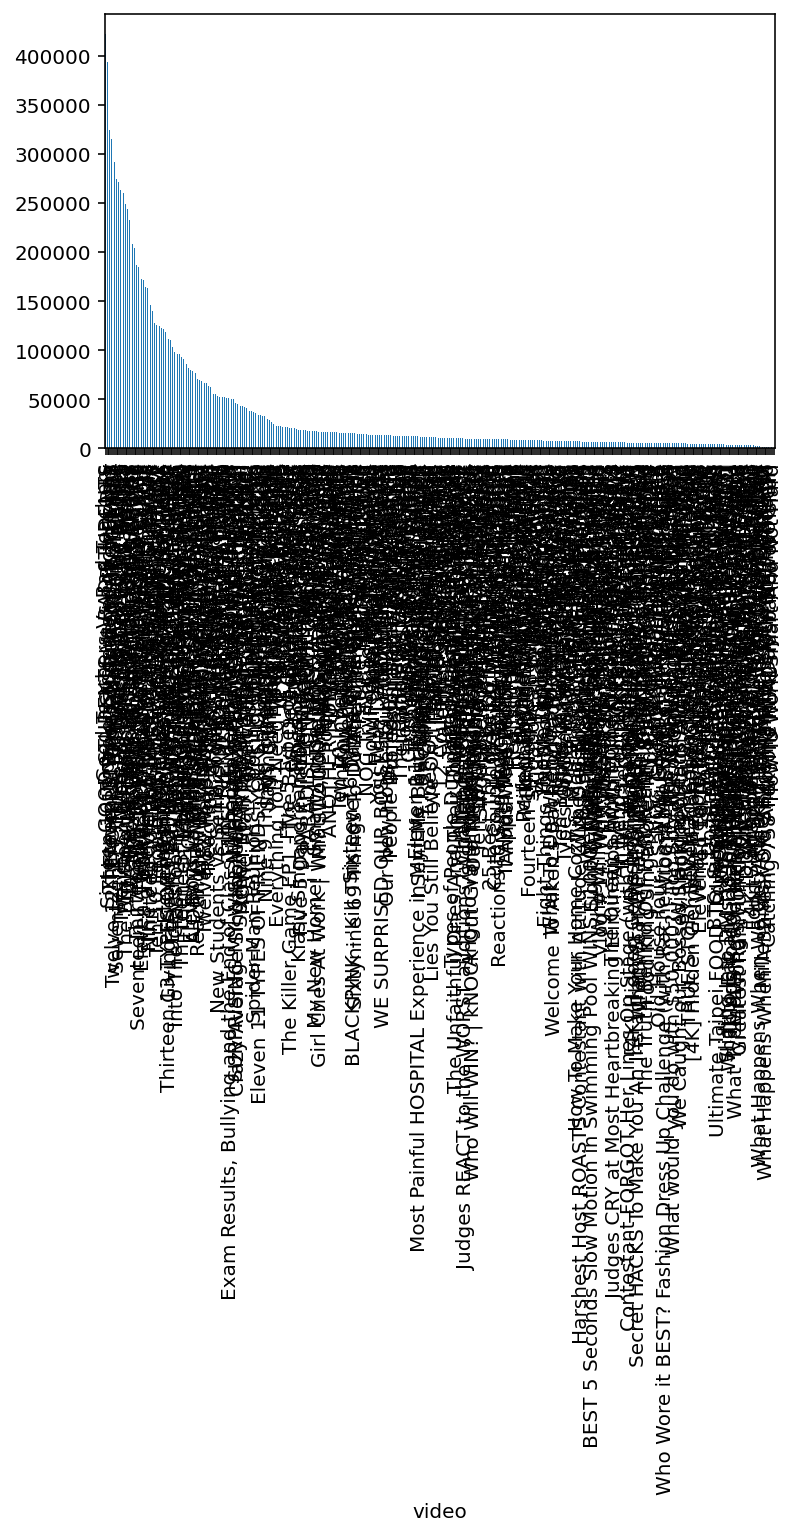

In [46]:
# most popular among the video_title

day = youtuberdata.loc[youtuberdata['Day_upload'] == 'Sunday']

totalviews = day.groupby(['video'])['Likes'].sum()

a = totalviews.sort_values(ascending=False)

b = totalviews.nlargest

print(a)
print(b)

totalviews.sort_values(ascending=False).plot(kind = 'bar')

In [28]:
print(youtuberdata.Day_upload.unique())
print(youtuberdata.the_channel.unique())

freq_table = pd.crosstab(index = youtuberdata['Day_upload'],
                            columns = youtuberdata['the_channel'])


freq_table

['Sunday' 'Monday' 'Wednesday' 'Saturday' 'Friday' 'Thursday']
['Wah Banana' 'Ryan Sylvia' 'JianHao Tan']


the_channel,JianHao Tan,Ryan Sylvia,Wah Banana
Day_upload,,,
Friday,0,140,0
Monday,0,0,2
Saturday,0,36,0
Sunday,90,126,156
Thursday,0,1,1
Wednesday,0,2,6


In [47]:
freq_table1 = pd.crosstab(index = youtuberdata['the_channel'],
                         columns = youtuberdata['Category'])

freq_table1

Category,BEHIND THE SCENES,Baby Starley,Bananas' Choice,CHALLENGES,COMEDY,DO IT FOR MONEY,Daily Vlogs,Food King Singapore 2018,Food King Singapore 2019,Food King Singapore 2020,...,The Killer Game Season 2,The Killer Game Season 3,The Killer Game Season 4,The Titan Academy(School Series),Trailer,Types Of,VLOGS,VS,What Happens When,kNOCK OUT! (Reality Show)
the_channel,,,,,,,,,,,,,,,,,,,,,
JianHao Tan,0,3,0,2,4,0,1,0,0,0,...,0,0,0,35,0,0,0,0,0,0
Ryan Sylvia,6,0,0,0,36,24,0,39,39,46,...,0,0,0,0,0,11,7,0,3,11
Wah Banana,0,0,3,0,34,0,0,0,0,0,...,1,1,1,0,1,38,0,15,0,0


Top Views on Sunday:
 Views
29373043    422000
38739400    394000
24894854    325000
33738782    315000
32585502    302000
             ...  
82784         1800
16263         1700
123377        1600
780915        1535
214151         400
Name: Likes, Length: 372, dtype: int64

Most Likes video: Views
29373043    422000
Name: Likes, dtype: int64


<AxesSubplot:xlabel='Views'>

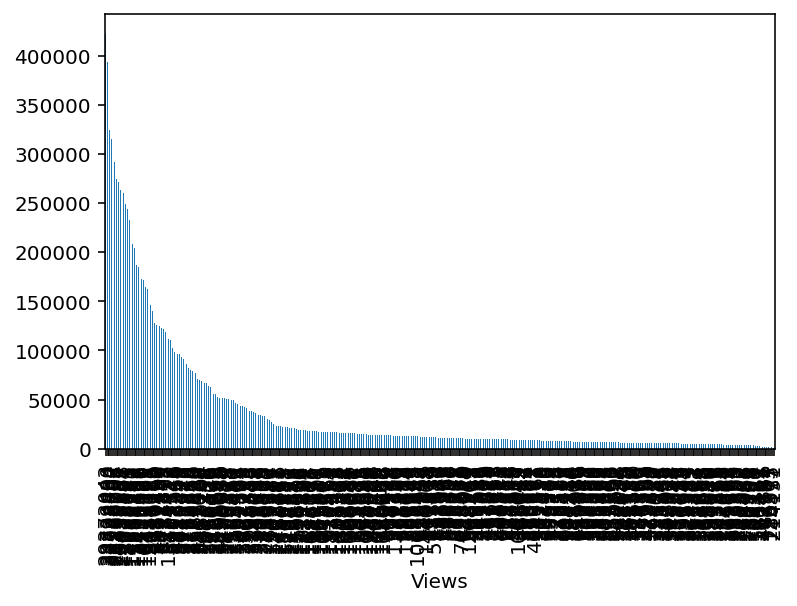

In [30]:
Sunday = youtuberdata.loc[youtuberdata['Day_upload']=='Sunday']
Views = Sunday.groupby(['Views'])['Likes'].sum()

a = Views.sort_values(ascending=False)

b = Views.nlargest(1)

print("Top Views on Sunday:\n", a)

print("\nMost Likes video:", b)

Views.sort_values(ascending=False).plot(kind='bar')


In [31]:
youtuberdata['the_channel'].value_counts()

Ryan Sylvia    305
Wah Banana     165
JianHao Tan     90
Name: the_channel, dtype: int64

In [32]:
youtuberdata['Time_upload'].value_counts()

15:00:00    281
18:00:00     92
21:00:00     60
17:58:00      5
17:59:00      5
           ... 
20:58:00      1
21:31:00      1
18:32:00      1
15:26:00      1
21:29:00      1
Name: Time_upload, Length: 79, dtype: int64

In [33]:
youtuberdata['Day_upload'].value_counts()

Sunday       372
Friday       140
Saturday      36
Wednesday      8
Monday         2
Thursday       2
Name: Day_upload, dtype: int64

In [34]:
youtuberdata['Category'].value_counts()

COMEDY                                                   74
Types Of                                                 49
Food King Singapore 2020                                 46
Short Film Wannabe                                       42
Food King Singapore 2018                                 39
Food King Singapore 2019                                 39
The Titan Academy(School Series)                         35
RECOMMENDED(TOP PICK)                                    24
DO IT FOR MONEY                                          24
LIFESTYLE VIDEOS                                         24
How People_                                              19
NOC Spotlight                                            16
VS                                                       15
How To_                                                  14
kNOCK OUT! (Reality Show)                                11
TRAVEL                                                    9
TRAVEL GUIDES                           

In [35]:
df1 = youtuberdata.groupby("the_channel")['Views', 'Likes'].sum()

print(df1, "\n")

print(df1.Views.nlargest(3), "\n")

print(df1.Likes.nlargest(3))

                 Views     Likes
the_channel                     
JianHao Tan  680310418  10284100
Ryan Sylvia  137328997   1899683
Wah Banana   152047222   2423000 

the_channel
JianHao Tan    680310418
Wah Banana     152047222
Ryan Sylvia    137328997
Name: Views, dtype: int64 

the_channel
JianHao Tan    10284100
Wah Banana      2423000
Ryan Sylvia     1899683
Name: Likes, dtype: int64


<ipython-input-35-27512c0ea030>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = youtuberdata.groupby("the_channel")['Views', 'Likes'].sum()


In [36]:
#youtuberdata['Date_upload'] = pd.to_datetime(youtuberdata['Date_upload'])
#youtuberdata['month'] = youtuberdata['Date_upload'].dt.month

df2 = youtuberdata.groupby(["Date_upload", "subs_view_percentage"])["Views"].mean()
print(df2)

print("total:", df2.mean())

Date_upload  subs_view_percentage
01-01-2021   14.17                    141728.0
01-02-2019   43.93                    439157.0
01-03-2019   23.09                    230885.0
01-03-2020   37.24                    372384.0
01-04-2018   100                     1582448.0
                                       ...    
31-05-2020   26.15                    344771.0
             89.64                   4114592.0
31-07-2020   43.85                    438213.0
31-08-2018   54.07                    540712.0
31-12-2018   10.65                    140555.0
Name: Views, Length: 559, dtype: float64
total: 1717378.7611806798


In [37]:
df1 = youtuberdata.groupby("video")['Views', 'Likes'].sum()

print(df1, "\n")

print(df1.Views.nlargest(3), "\n")

print(df1.Likes.nlargest(3))


                                                      Views  Likes
video                                                             
12 Countries Surprise Singapore                      870712  11000
12 Zodiac Signs At Reunion Dinner                   2162898  53000
12 Zodiac Signs In The Gym                          2428663  56000
25 Best Things to Do In Bangkok, Thailand            751027   9800
28 Best Things to Do In Kyoto, Japan                 299929   4400
...                                                     ...    ...
[4K] Hidden Gems in Bintulu, Malaysia (NOC Trav...   426570   5900
[4K] Hidden Gems in Medan, Indonesia (NOC Trave...   334267   4800
[4K] Singapore Like You've Never Seen Before         701129   3200
[5K] Santa Baby in 7 Styles | 21:9                   388333  10000
iPhone vs Android                                   4093411   8300

[560 rows x 2 columns] 

video
GOOD STUDENTS vs BAD STUDENTS                38739400
Thirteen 13 Types of Students After Exams  

<ipython-input-37-c62004b03f18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = youtuberdata.groupby("video")['Views', 'Likes'].sum()


In [40]:
#highest_ratings = youtuberdata.groupby('Ratings').sum()
#video = highest_ratings['video']
#video.nlargest()                       

In [48]:
g = youtuberdata.groupby(["the_channel", "video", "Likes"])

total = g[["Views"]].sum().add_prefix("Total_")

total

# comparison


Total_Views
the_channel video                                            Likes              
JianHao Tan A Day in JianHao's Life as a Dad (In Quarantine) 77000       2610309
            A Week in Dubai                                  43000       2657009
            ANOTHER HOLIDAY! (Krabi, Thailand)               17000       1478342
            Back to School: Expectations vs Reality          208000     17518740
            Boy or Girl?  - Gender Reveal Party              128000      5339368
...                                                                          ...
Wah Banana  You As Student VS Grown Up                       17000       1873454
            You With Date vs You With Friends                14000        997919
            Your Mother vs My Mother                         262000     20955533
            Your Stingy Friends                              15000       1564693
            iPhone vs Android                                8300        4093411

[560 rows x 1 columns]

In [50]:
#s = youtuberdata.loc[(youtuberdata.Time_upload == 'Likes')]

#a = s.groupby('the_channel')['Views'].sum()

#spendgraph = a.plot.bar()

#ply.ylabel("Views")

#comparison

In [ ]:
# dfn = youtuberdata.convert_dtypes()
# dfn

In [ ]:
# youtuberdata.loc[most_commentID]

In [ ]:
g = youtuberdata.groupby(["Comments", "Ratings", "Views"])

total = g[["Likes"]].sum().add_prefix("Total_")

total

# comparison


In [51]:
# Video length = ranking = likes = views

youtuberdata.corr()

,No,Views,Likes,Dislikes,Comments,Ratings
No,1.000000,0.225292,0.271904,0.208041,0.273274,0.135165
Views,0.225292,1.000000,0.927269,0.965284,0.819876,-0.037696
Likes,0.271904,0.927269,1.000000,0.891864,0.931996,0.058488
Dislikes,0.208041,0.965284,0.891864,1.000000,0.783538,-0.106117
Comments,0.273274,0.819876,0.931996,0.783538,1.000000,0.074809
Ratings,0.135165,-0.037696,0.058488,-0.106117,0.074809,1.000000


In [52]:
top_video = youtuberdata[['video', 'Views']]
views = top_video.groupby('video')[['Views']]
total = views.sum()

total = total.sort_values(by='Views', ascending=False)

total.head()

,Views
video,
GOOD STUDENTS vs BAD STUDENTS,38739400
Thirteen 13 Types of Students After Exams,33738782
Eleven 11 Types of Students in an Exam,32585502
Good Teachers Vs Bad Teachers,29373043
Rich People VS Normal People,28380054


In [53]:
top_video = total.iloc[:10,:]
print(top_video)

                                                 Views
video                                                 
GOOD STUDENTS vs BAD STUDENTS                 38739400
Thirteen 13 Types of Students After Exams     33738782
Eleven 11 Types of Students in an Exam        32585502
Good Teachers Vs Bad Teachers                 29373043
Rich People VS Normal People                  28380054
Twelve 12 TEACHERS YOU'LL NEVER WANT TO MEET  26286203
Sixteen 16 Types of Students on Picture Day   24894854
Your Mother vs My Mother                      20955533
Nine 9 TYPES OF STUDENTS IN SCHOOL            19898287
Twelve 12 Types of Reactions to Exam Results  19037344


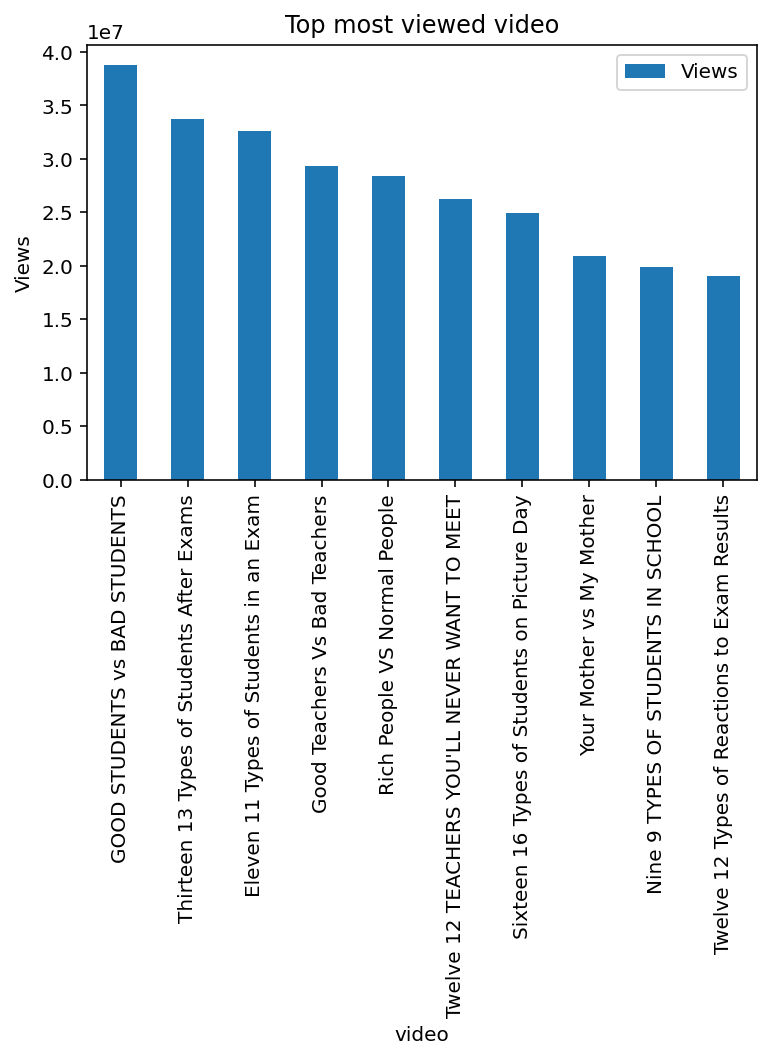

In [54]:
top_video.plot(kind='bar')

plt.title('Top most viewed video')
plt.xlabel('video')
plt.ylabel('Views')
plt.legend(loc=0)
plt.show()

<AxesSubplot:>

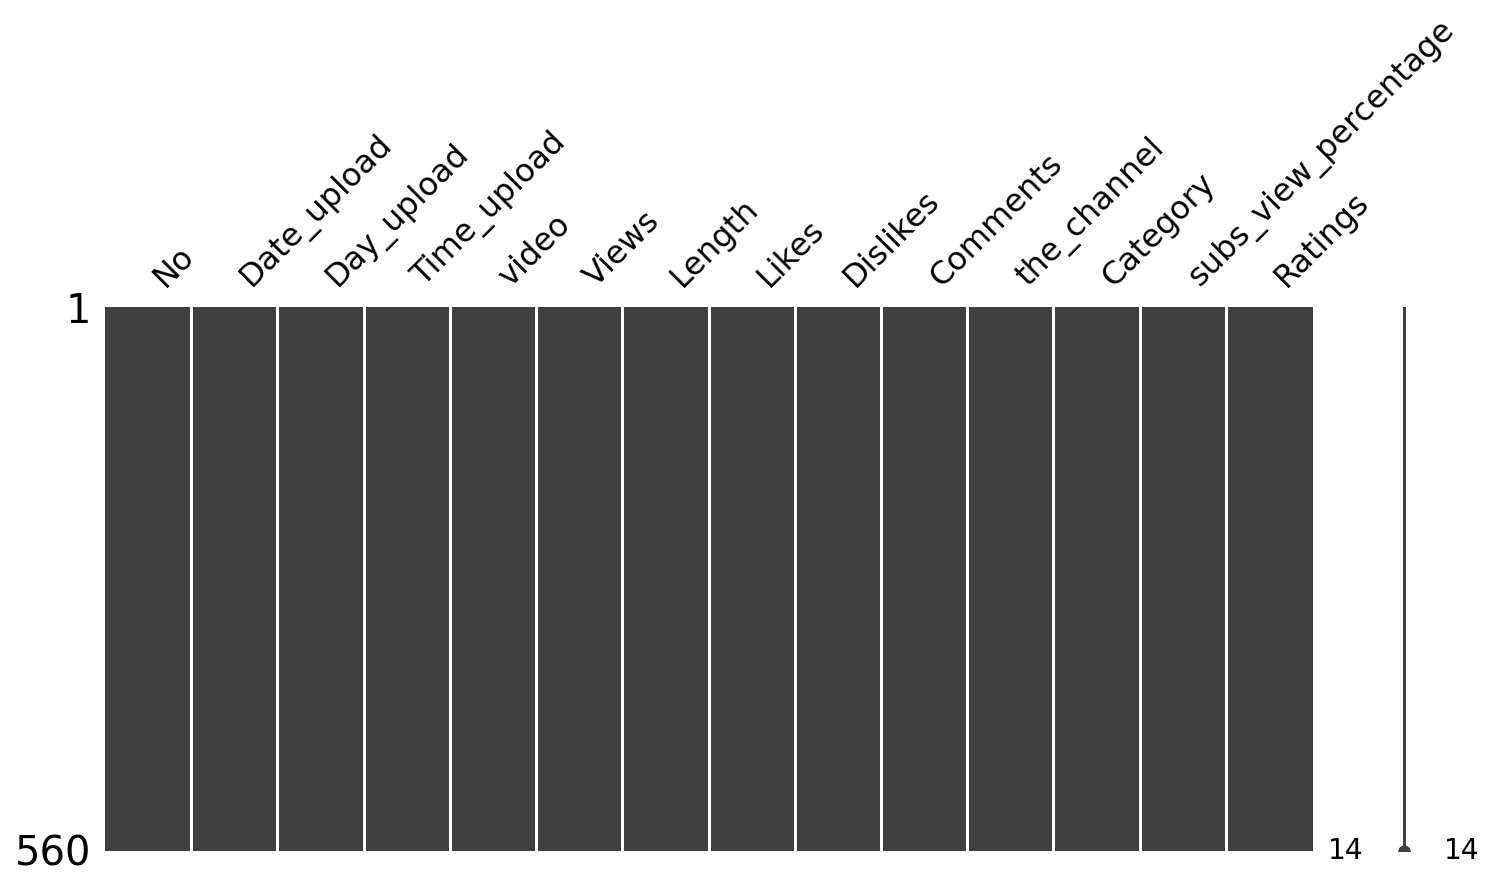

In [55]:
# check missing values

msno.matrix(youtuberdata, figsize=(12,5))

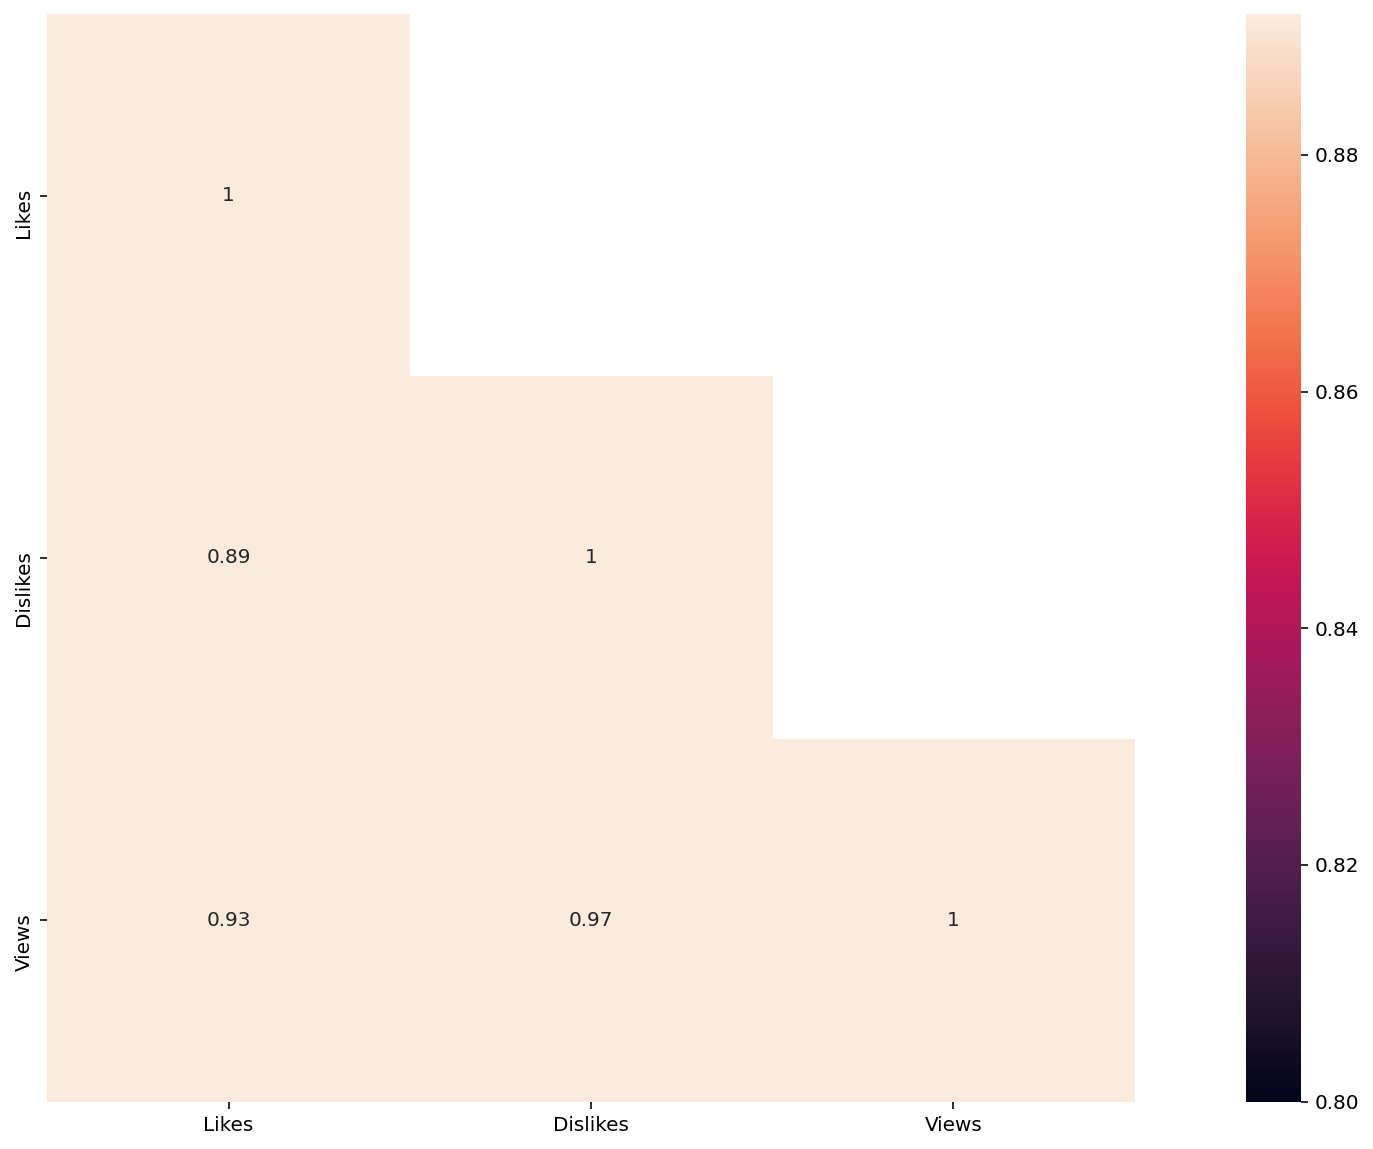

In [56]:
correlation = youtuberdata[["Day_upload", "Time_upload", "Likes", "Dislikes", "Views", "Length"]].corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(correlation, mask=mask, vmax=.8, square=True, annot=True)

plt.show()

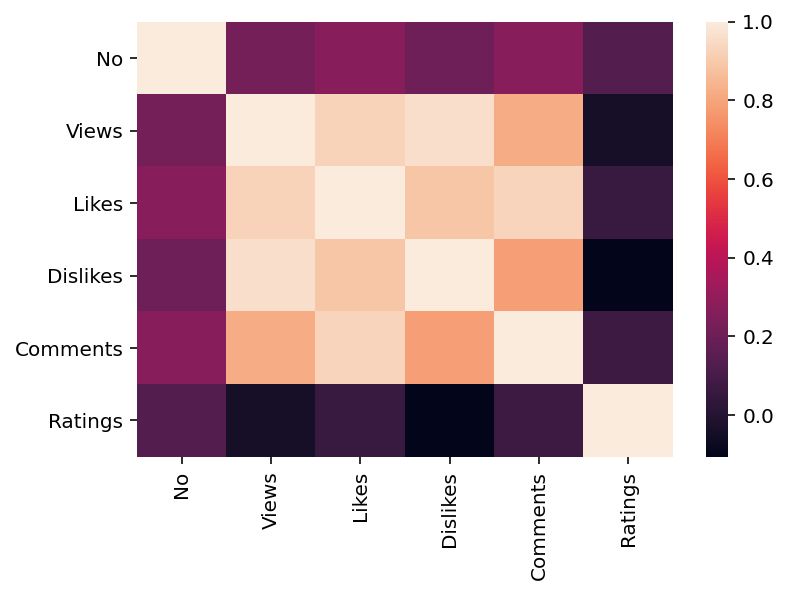

In [57]:
sns.heatmap(youtuberdata.corr());

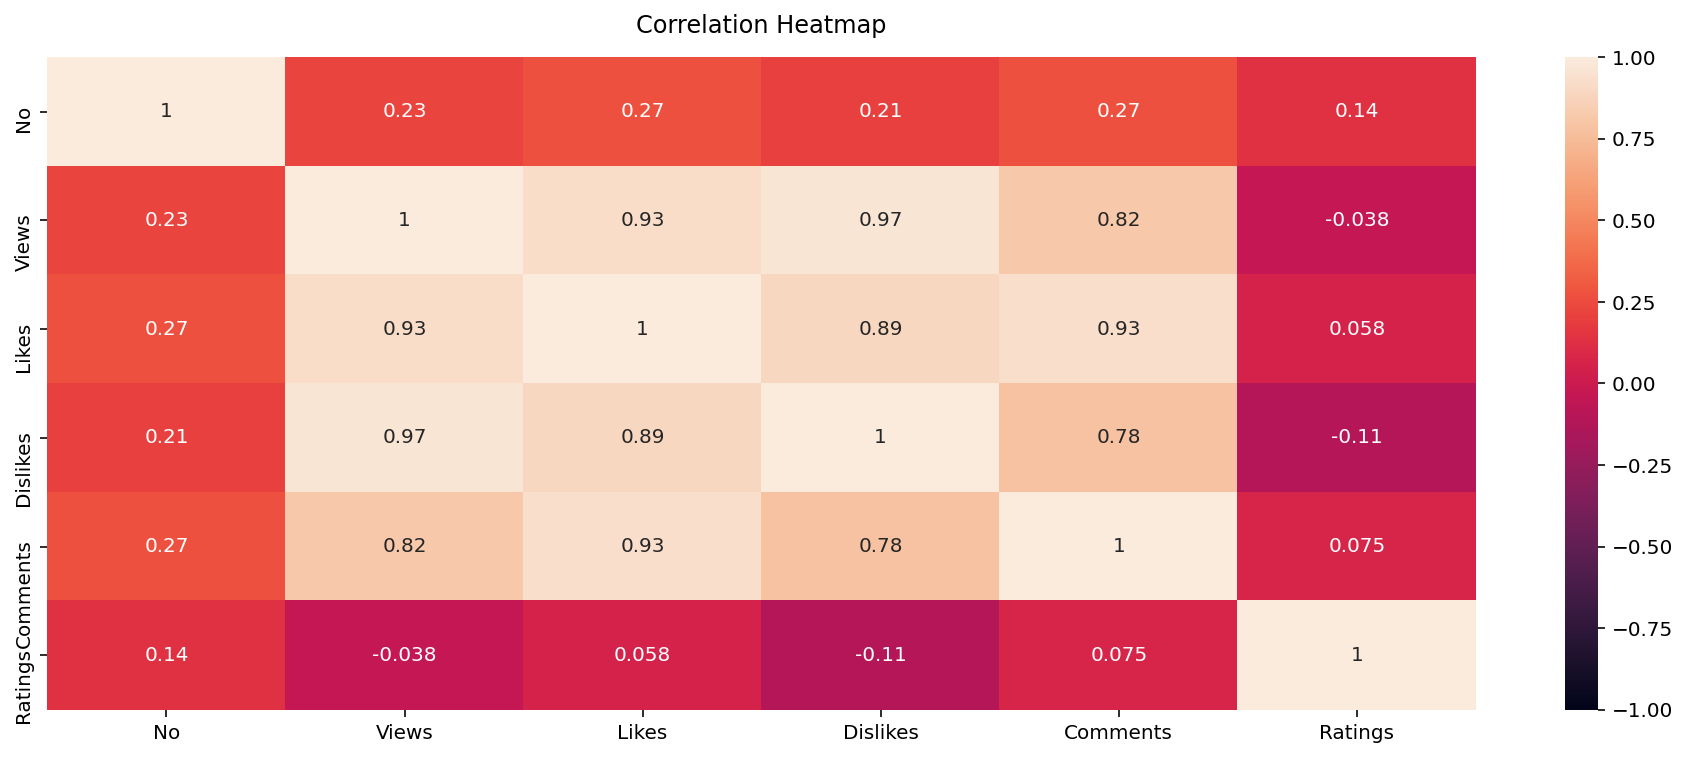

In [58]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(youtuberdata.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

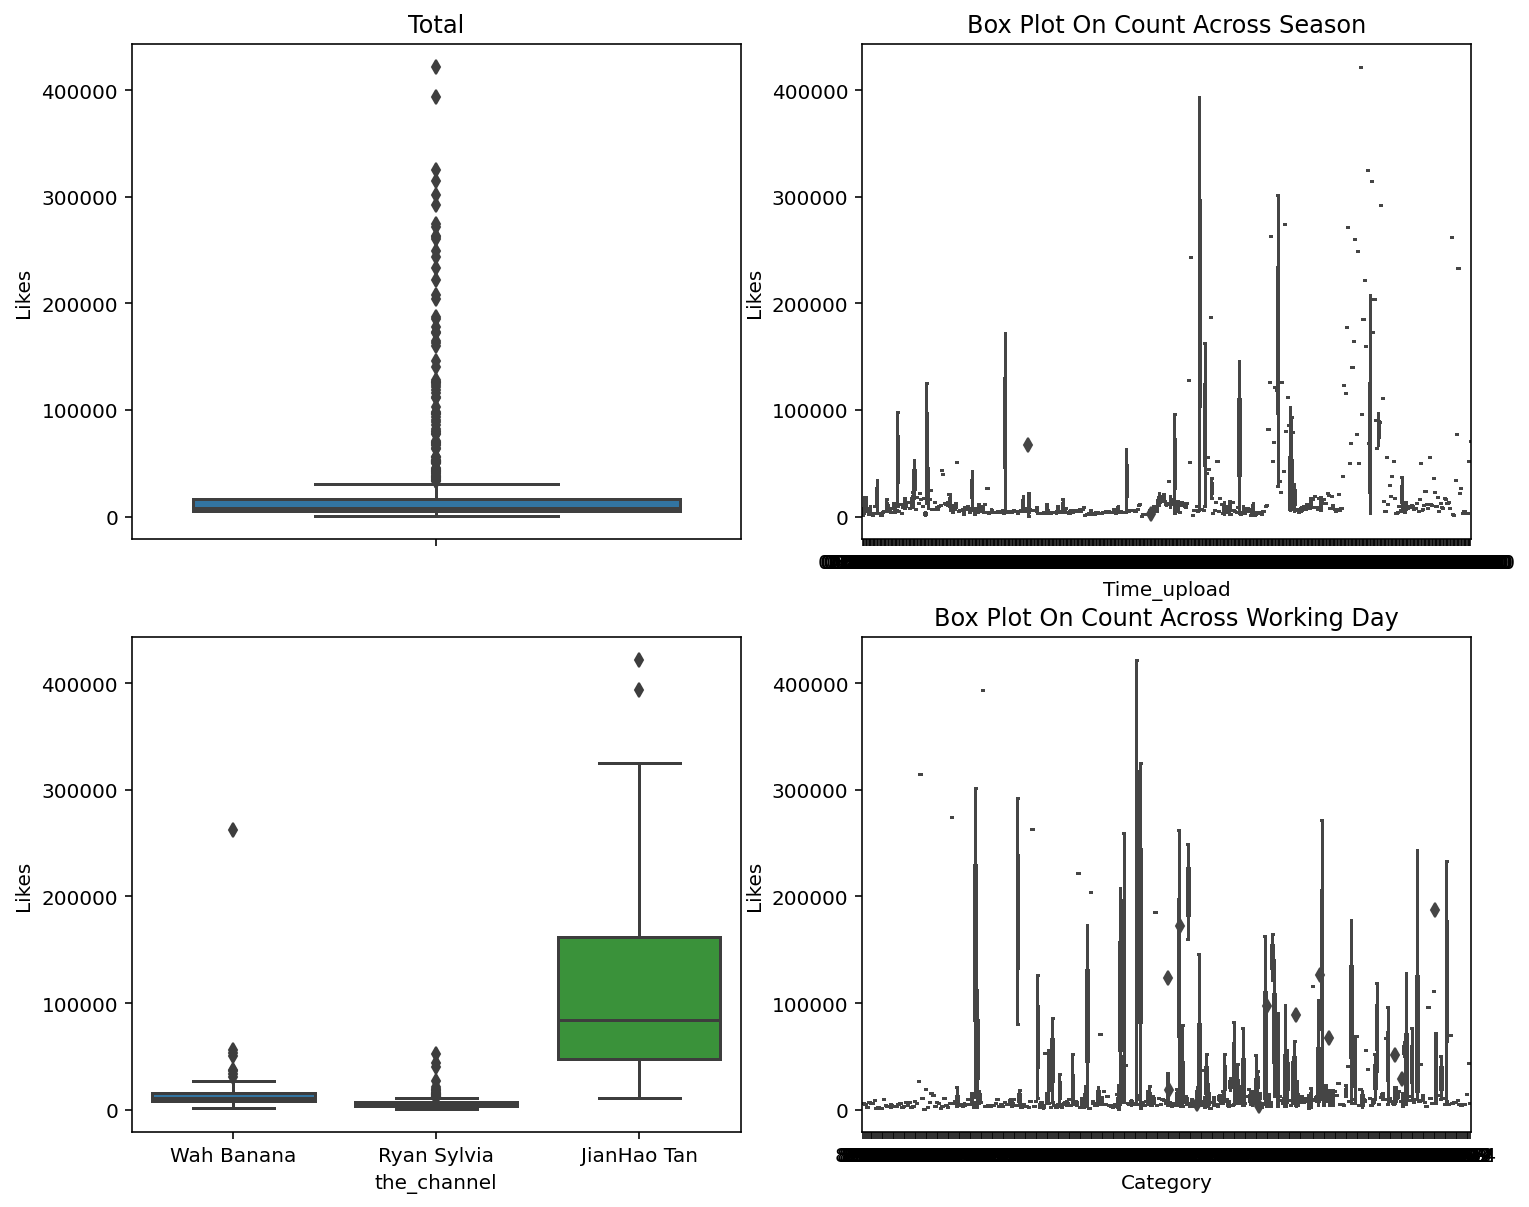

In [59]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=youtuberdata,y="Likes",orient="v",ax=axes[0][0])

sns.boxplot(data=youtuberdata,y="Likes",x="Length",orient="v",ax=axes[0][1])

sns.boxplot(data=youtuberdata,y="Likes",x="the_channel",orient="v",ax=axes[1][0])

sns.boxplot(data=youtuberdata,y="Likes",x="Ratings",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Likes',title="Total")

axes[0][1].set(xlabel='Time_upload', ylabel='Likes',title="Box Plot On Count Across Season")

axes[1][1].set(xlabel='Category', ylabel='Likes',title="Box Plot On Count Across Working Day")

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


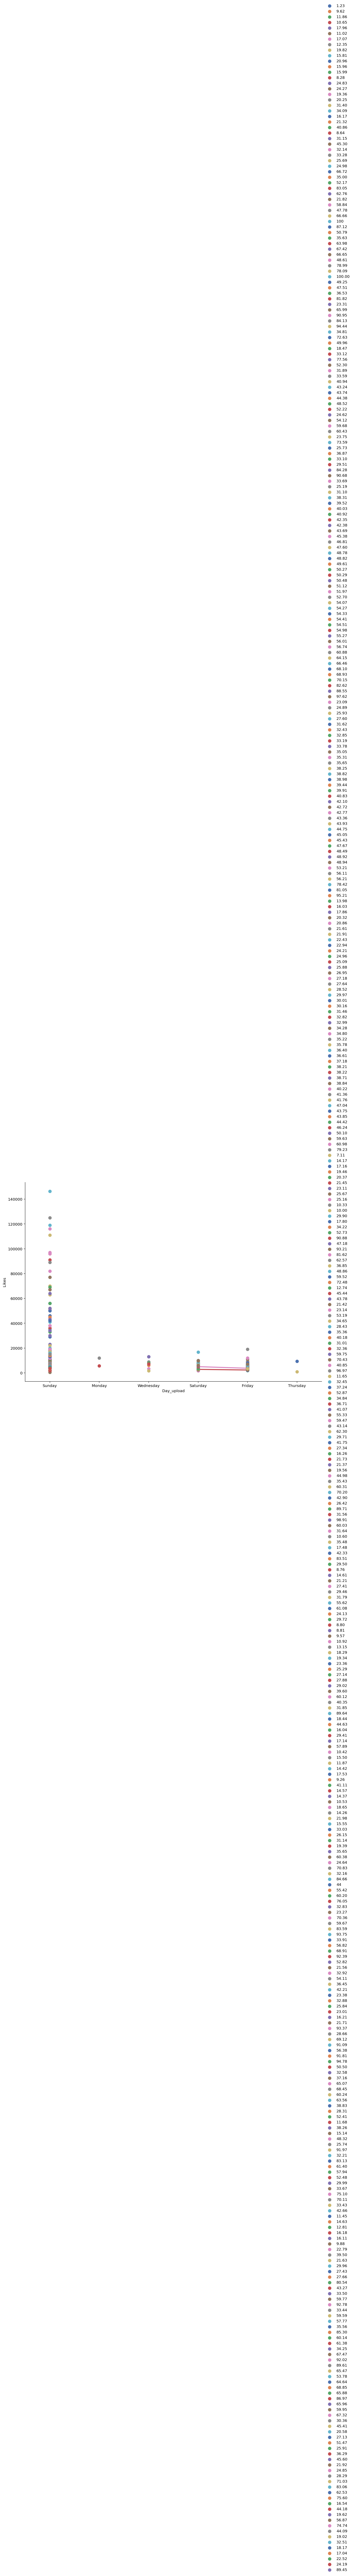

In [60]:
sns.FacetGrid(data=youtuberdata,size=8,aspect=1.5).\
map(sns.pointplot,'Day_upload','Likes','subs_view_percentage',palette="deep",ci=None).\
add_legend()

plt.show()

In [62]:
top_rated = youtuberdata[0:80]
fig=px.sunburst(top_rated, path=['the_channel', 'Views'], values='Likes', color='Likes')

fig.show()

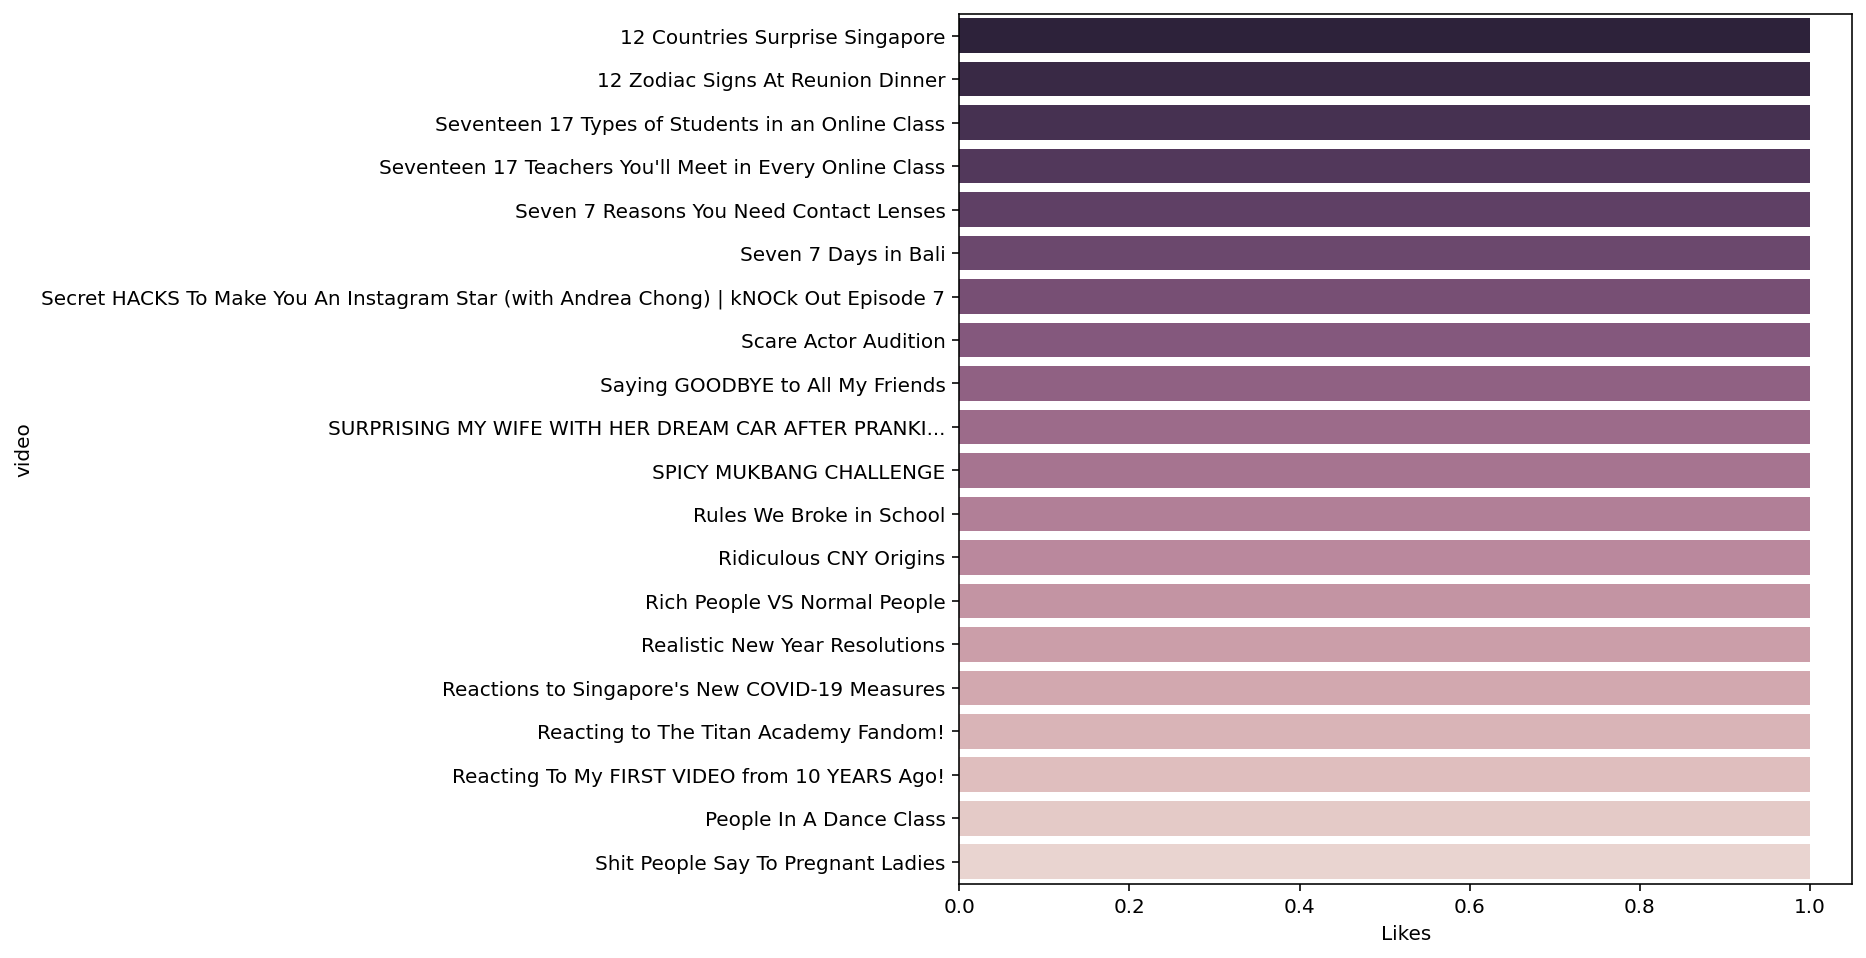

In [64]:
youtuberdata = youtuberdata.groupby("video").size().reset_index(name="Views") \
    .sort_values("Views", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="Views", y="video", data=youtuberdata,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="video")

In [69]:
plt.hist(list(youtuberdata.the_channel), bins=32, density=True, alpha=0.5, histtype='bar', color='steelblue', edgecolor='blue',rwidth=1,align='mid')
plt.xticks(rotation=90)
plt.title('Comments')
plt.ylabel('the_channel')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'the_channel'

<AxesSubplot:xlabel='video'>

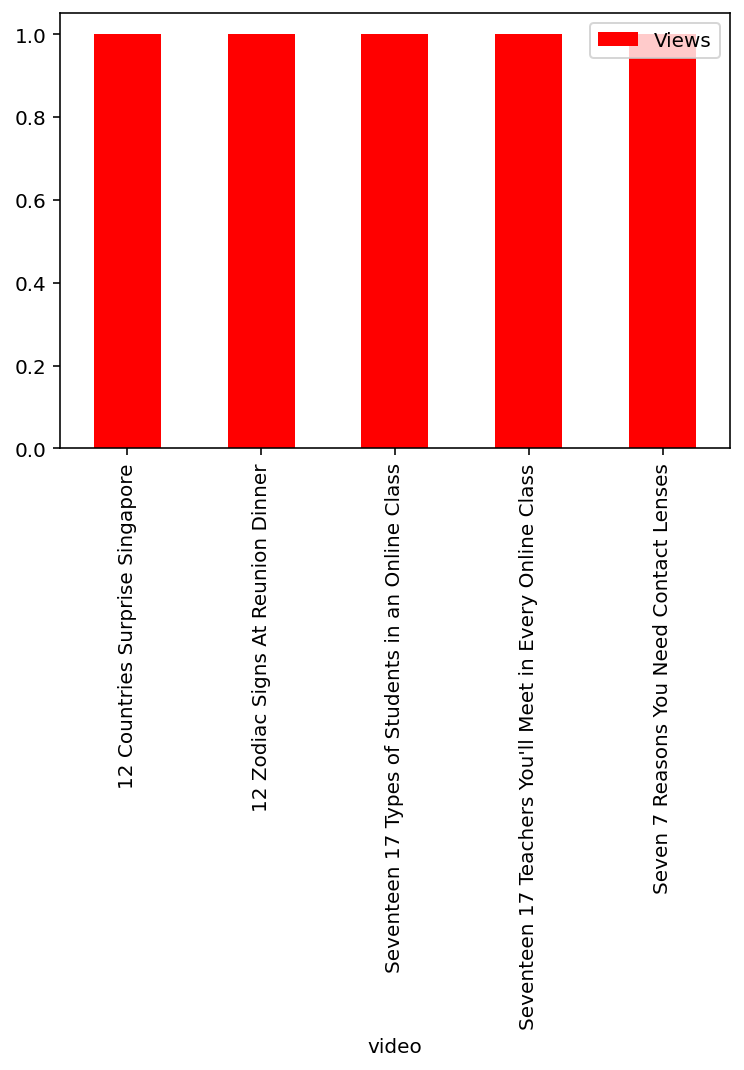

In [66]:
top20 = youtuberdata[0:5]
top20.plot(kind='bar', x='video', y='Views', color='red')